In [98]:
import numpy as np

import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.externals import joblib
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,confusion_matrix, roc_auc_score,roc_curve,auc

from sklearn.pipeline import Pipeline

In [2]:
cd ..

/Users/Faliha/Desktop/cap/Medical-Record-Classifier


In [3]:
cd code 

/Users/Faliha/Desktop/cap/Medical-Record-Classifier/code


In [100]:
df0 = pd.read_json('smokers_surrogate_all_data copy.json')

In [101]:
df=df0.copy()

In [102]:
df=df.T

In [103]:
df=df.reset_index()

In [104]:
df.columns = ['id', 'smoking_status','descrp']

In [105]:
df['smoking_status']=df['smoking_status'].replace({'SMOKER': 'CURRENT SMOKER'})

In [106]:
df['smoking_cat'] = df['smoking_status'].factorize()[0]
category_id_df = df[['smoking_status', 'smoking_cat']].drop_duplicates().sort_values('smoking_cat')
category_to_id = dict(category_id_df.values)

In [107]:
X  = df['descrp']
y = df['smoking_cat']

In [108]:
X_train,  X_test,  y_train, y_test  =  train_test_split(X,y,test_size=0.30, random_state=42)

In [109]:
y_test.value_counts()

0    106
1     22
3     15
2      8
Name: smoking_cat, dtype: int64

In [66]:
# list to store the predicted labels
predlist=[]

for i in X_test:
    i=[i]
    #layer 1 classification
    #loading the pickled model and tfidf
    lr=joblib.load('1.LR.pkl.')
    tfidf1=joblib.load('1.LR-TFIDF.pkl')
    xtfidf_lr=tfidf1.transform(i)
    
    
    pred1=lr.predict(xtfidf_lr)
    
    if pred1==1: #corresponds to Unknown , store are category 0
        pred1=0
        predlist.append(pred1)
        
    else:
        
        #Layer 2 classification
        
        gb2=joblib.load('2.GB.pkl')
        tfidf2=joblib.load('2.GB-TFIDF.pkl')
        xtfidf_gb2=tfidf2.transform(i)
        
        pred2=gb2.predict(xtfidf_gb2)
        
        if pred2==1:#corresponds to Non-Smoker , store are category 2
            pred2=1
            predlist.append(pred2)
            
        else:
            
            #Layer 3 classification
            
            gb3=joblib.load('3.GB.pkl')
            tfidf3=joblib.load('3.GB-TFIDF.pkl')
            xtfidf_gb3=tfidf3.transform(i)
            
            pred3=gb3.predict(xtfidf_gb3)
            
            if pred3==1: #corresponds to Past Smoker , store are category 2
                pred3=2
                predlist.append(pred3)
                
            else:
                pred3=3 #corresponds to Current Smoker , store are category 3
                predlist.append(pred3)
                


In [67]:
#Checking to see if the lengths are equal for the actual and predicted list 

len(predlist) 

151

In [68]:
len(y_test)

151

In [81]:
cm=confusion_matrix(y_test, predlist)

In [96]:
def plot_confusion_matrix(cm):
    '''Code stolen brazenly from sklearn example.'''
    

    print(cm)

    # Show confusion matrix in a separate window
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Unknown','Non-Smoker','Past Smoker', 'Current Smoker'],
                yticklabels=['Unknown','Non-Smoker','Past Smoker', 'Current Smoker'])
    plt.title('Confusion matrix', fontsize=22)
    
    
    
    
    plt.ylabel('True label', fontsize=18)
    
    plt.xlabel('Predicted label', fontsize=18)
    
    plt.show()

[[104   0   2   0]
 [  2  17   1   2]
 [  0   1   6   1]
 [  3   0   1  11]]


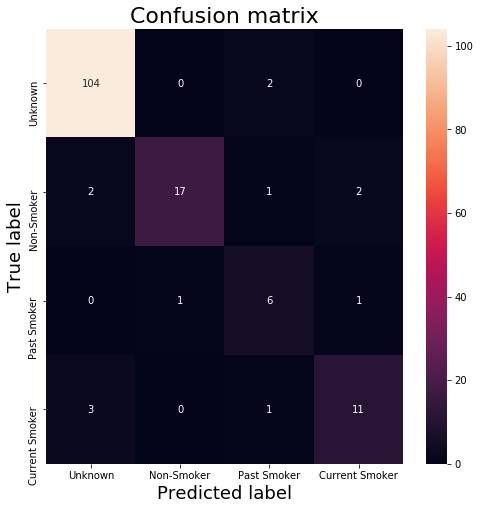

In [97]:
plot_confusion_matrix(cm)

In [113]:
# list to store the predicted labels
predlist=[]

for i in X:
    i=[i]
    #layer 1 classification
    #loading the pickled model and tfidf
    lr=joblib.load('1.LR.pkl.')
    tfidf1=joblib.load('1.LR-TFIDF.pkl')
    xtfidf_lr=tfidf1.transform(i)
    
    
    pred1=lr.predict(xtfidf_lr)
    
    if pred1==1: #corresponds to Unknown , store are category 0
        pred1=0
        predlist.append(pred1)
        
    else:
        
        #Layer 2 classification
        
        gb2=joblib.load('2.GB.pkl')
        tfidf2=joblib.load('2.GB-TFIDF.pkl')
        xtfidf_gb2=tfidf2.transform(i)
        
        pred2=gb2.predict(xtfidf_gb2)
        
        if pred2==1:#corresponds to Non-Smoker , store are category 2
            pred2=1
            predlist.append(pred2)
            
        else:
            
            #Layer 3 classification
            
            gb3=joblib.load('3.GB.pkl')
            tfidf3=joblib.load('3.GB-TFIDF.pkl')
            xtfidf_gb3=tfidf3.transform(i)
            
            pred3=gb3.predict(xtfidf_gb3)
            
            if pred3==1: #corresponds to Past Smoker , store are category 2
                pred3=2
                predlist.append(pred3)
                
            else:
                pred3=3 #corresponds to Current Smoker , store are category 3
                predlist.append(pred3)
                


In [ ]:
cm=confusion_matrix_matrix(y, predlist)
plot_confusion_matrix(cm)

In [111]:
def text_process(description):
    
    
        
    nopunc=[char for char in description if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    splitnum  = re.split('(\d+)',nopunc)
    splitnum=' '.join(splitnum)
    new=re.sub(" \d+", " ", splitnum)

In [112]:
# for i in X_test:
#     i=[i]
#     #layer 1 classification
#     #loading the pickled model and tfidf
#     tfidf_vect = TfidfVectorizer(use_idf= True,sublinear_tf= True,norm= 'l2',preprocessor=text_process,
#                              ngram_range= (1, 3),min_df= 4,max_features=3000,max_df=0.9)
#     tfidf_vect.fit(X_train)
#     xtrain_tfidf =  tfidf_vect.transform(X_train)
#     xtest_tfidf =  tfidf_vect.transform(X_test)
    
#     clf=LogisticRegression(random_state=15325,penalty='l1',C=1000)
#     clf.fit(X_train, y_train)
    
#     # predict the labels on validation dataset
#     pred1 = clf.predict(xtest_tfidf)
    
    
    
#     if pred1==1: #corresponds to Unknown , store are category 0
#         pred1=0
#         predlist.append(pred1)
        
#     else:
        
#         #Layer 2 classification
        
#         tfidf_vect = TfidfVectorizer(use_idf= False,sublinear_tf= True,norm= 'l1',preprocessor=text_process,
#                              ngram_range= (1, 2),min_df= 4,max_features=7000,max_df=0.8)
#         tfidf_vect.fit(X_train)
#         xtrain_tfidf =  tfidf_vect.transform(X_train)
#         xtest_tfidf =  tfidf_vect.transform(X_test)
        
        
#         clf= GradientBoostingClassifier(min_samples_leaf= 1,
#                                  min_samples_split= 20,max_features= 'auto',max_depth=1, learning_rate= 0.05,
#                                    n_estimators=100,random_state=15325)
#         clf.fit(X_train, y_train)
    
#     # predict the labels on validation dataset
#         pred2 = clf.predict(xtest_tfidf)
        
#         if pred2==1:#corresponds to Non-Smoker , store are category 2
#             pred2=1
#             predlist.append(pred2)
            
#         else:
            
#             #Layer 3 classification
            
#             tfidf_vect = TfidfVectorizer(use_idf= False,sublinear_tf= False,norm= 'l1',preprocessor=text_process,
#                              ngram_range= (1, 2),min_df= 4,max_features=4000,max_df=0.8)
#             tfidf_vect.fit(X_train)
#             xtrain_tfidf =  tfidf_vect.transform(X_train)
#             xtest_tfidf =  tfidf_vect.transform(X_test)
            
#             GradientBoostingClassifier(min_samples_leaf= 1,
#                                  min_samples_split= 2,max_features= 'sqrt',
#                                        max_depth=15, learning_rate= 0.005,n_estimators=200,random_state=15325)
            
#             clf.fit(X_train, y_train)
    
#     # predict the labels on validation dataset
#             pred3 = clf.predict(xtest_tfidf)
#             if pred3==1: #corresponds to Past Smoker , store are category 2
#                 pred3=2
#                 predlist.append(pred3)
                
#             else:
#                 pred3=3 #corresponds to Current Smoker , store are category 3
#                 predlist.append(pred3)
                


TypeError: expected string or bytes-like object